# Tecnologias e Aplicações

## Variational Autoencoder

In [8]:
from vae import *

In [9]:
# Fetch and prepare data
data = fetch_data("../data/chinese_mnist")

# Make and compile model
model = make_model()

# Train or load model
EPOCHS = 40
model = train(model, data, EPOCHS, save_path="../models")

[INFO] Trying to load pretrained model
[INFO] Loaded Trained Model


In [10]:
# tf.keras.utils.plot_model(
#     model[2], to_file='vae_model.png', show_shapes=True,
#     show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
# )

In [11]:
# Get predictions for dataset
preds = predict_all(model, data)

[INFO] Predicting set


In [12]:
print("[INFO] Displaying some results")
def display_from_dataset(i):
    data_set = list(data[0][0])

    (a,b) = divmod(i,BATCH_SIZE)
    
    original = data_set[a][0].numpy()[b]
    predicted = preds[i]

    color = 'viridis'

    fig, axarr = plt.subplots(1,2)
    axarr[0].imshow(original, cmap=color)
    axarr[0].set_title("original")
    axarr[0].axis('off')
    axarr[1].imshow(predicted, cmap=color)
    axarr[1].set_title("predicted")
    axarr[1].axis('off')

    fig.tight_layout()
    plt.show()

[INFO] Displaying some results


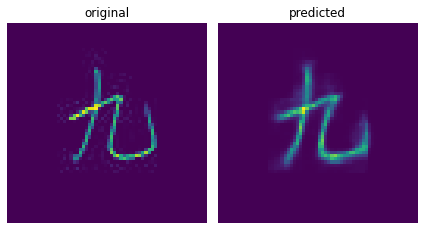

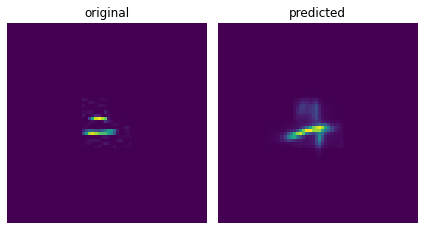

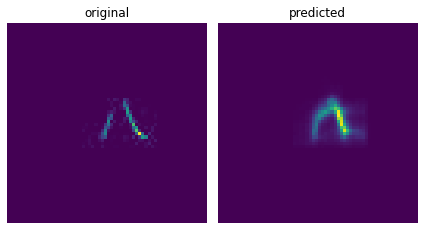

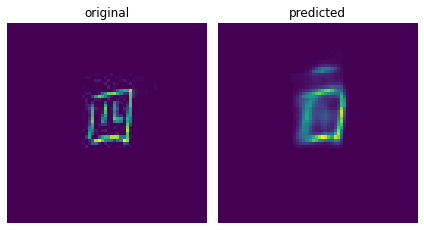

In [13]:
display_from_dataset(0)
display_from_dataset(1)
display_from_dataset(2)
display_from_dataset(3)

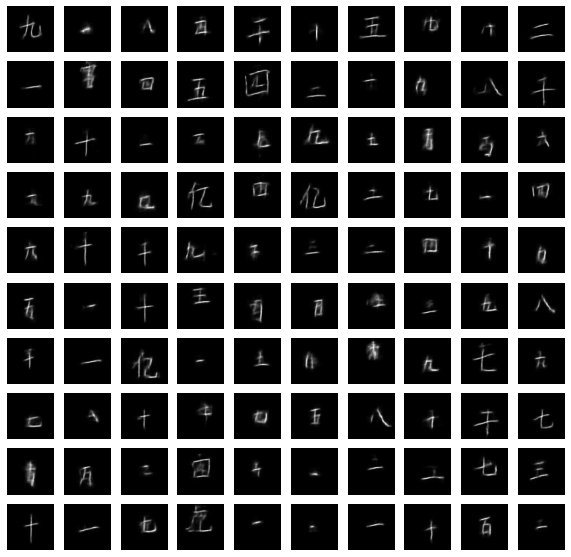

In [14]:
#from utils import *
import numpy as np
encoder, decoder, vae = model
(train_dataset, train_len), (test_dataset, test_len) = data
    
samples = []
    
for train_x, _ in train_dataset:
    z, mean, logvar = encoder(train_x)
    samples.extend(decoder(z).numpy())
        
show_samples(samples[:100])